## Dag Arne Lydvo
## STK2100
## Mandatory assignment 2 of 2

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler,Normalizer
from sklearn.decomposition import PCA

from pygam import GAM,LogisticGAM, s, f, LinearGAM

## Reading the data

We are reading the data into a dataframe from the url, then
dividing it into train and test set. 

Then splitting the data into X frames for the explanatory variables and y frames for the response variables.
The training sets consists of 1536 instances and the test set of 3065. 

In [2]:
df = pd.read_table("https://www.uio.no/studier/emner/matnat/math/STK2100/data/spam_data.txt",sep=" ")

In [3]:
train = df.loc[df.train == True].drop("train",axis=1)
test = df.loc[df.train != True].drop("train",axis=1)

In [4]:
train.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x49,x50,x51,x52,x53,x54,x55,x56,x57,y
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,True
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,True
8,0.15,0.00,0.46,0.0,0.61,0.00,0.30,0.00,0.92,0.76,...,0.00,0.271,0.0,0.181,0.203,0.022,9.744,445,1257,True
9,0.06,0.12,0.77,0.0,0.19,0.32,0.38,0.00,0.06,0.00,...,0.04,0.030,0.0,0.244,0.081,0.000,1.729,43,749,True
12,0.00,0.69,0.34,0.0,0.34,0.00,0.00,0.00,0.00,0.00,...,0.00,0.056,0.0,0.786,0.000,0.000,3.728,61,261,True


In [5]:
X_train = train.drop("y",axis=1)
X_test = test.drop("y",axis=1)

y_train = train.loc[:,"y"]
y_test = test.loc[:,"y"]

In [6]:
print(f"Shapes:\nX_train: {X_train.shape} | y_train: {y_train.shape}\nX_test: {X_test.shape} | y_test: {y_test.shape}")

Shapes:
X_train: (1536, 57) | y_train: (1536,)
X_test: (3065, 57) | y_test: (3065,)


## Problem a)

Fitting a logistic regression model to the training data and the predict using the X_test set. 
For scoring I am using the accuracy_score function from the Scikit-learn library. \
The model seems to be doing fairly well at 92.1 % accuracy.

In [7]:
fit = LogisticRegression(max_iter=1e4).fit(X_train,y_train)

pred = fit.predict(X_test)

score = accuracy_score(y_test,pred)

print('Accuracy score: {:.2%}'.format(score))

Accuracy score: 92.10%


## Problem b)

The X_train and X_test datasets are scaled using Scikit-learns StandardScaler function to scale each variable to have variance of 1. This is so that all the variables will be treated equal when principal components are calculated. \
Then the principal components are created using the PCA function from Scikit-learn. Principal components for both train and test sets are created. 

The two first principal components are then fitted to a logistic model and predictions are made for the principal components of the scaled X_test set. \
The model are somewhat less accurate than the previous one at 87.47 %.

In [8]:
X_train_scaled = pd.DataFrame(StandardScaler().fit_transform(X_train), index=X_train.index)
X_train_scaled.columns = X_train.columns

X_test_scaled = pd.DataFrame(StandardScaler().fit_transform(X_test), index = X_test.index)
X_test_scaled.columns = X_test.columns

In [9]:
pd.DataFrame([X_train.var(),X_train_scaled.var()],index=['variance(X_train)','variance(X_train_scaled)']).applymap('{:.2f}'.format)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57
variance(X_train),0.07,1.22,0.29,2.28,0.48,0.09,0.18,0.14,0.09,0.31,...,0.09,0.07,0.06,0.01,0.48,0.05,0.01,1534.77,16698.18,365304.88
variance(X_train_scaled),1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [10]:
PCA_X_train = PCA().fit_transform(X_train_scaled)
PCA_X_test = PCA().fit_transform(X_test_scaled)

In [11]:
pd.DataFrame(PCA_X_train,columns=X_train.columns).head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57
0,-0.745813,-0.001220,-0.543658,0.166821,0.379664,-0.141470,-0.611727,0.145416,0.464244,-0.169731,...,0.045134,-0.370694,-0.101250,0.048414,0.242066,0.198206,0.021473,-0.093019,-0.165704,-0.010684
1,-1.657955,5.406824,2.753136,-3.355682,0.675306,-0.008918,-3.532403,-0.661995,-0.479075,0.956521,...,0.403760,1.637965,0.141401,0.151414,-0.244837,0.163417,-0.008541,-0.176678,0.022208,0.002181
2,-1.283149,3.462598,1.100446,-1.419728,0.542450,0.977236,2.627567,1.131569,-2.145209,0.620076,...,-0.235295,-1.114388,0.513960,-0.128784,0.062511,-0.265924,0.281776,-1.539771,-0.028275,0.009850
3,-0.817680,0.370357,-0.030195,0.039799,0.311281,-0.392116,-0.603977,-0.463080,0.271725,0.074094,...,0.025288,0.184419,-0.032082,0.039245,-0.000236,0.041161,-0.062834,0.256961,-0.100172,-0.005165
4,-0.706775,-0.024644,-0.579928,0.190186,0.308951,-0.087825,-0.643032,0.215263,0.324316,-0.130821,...,0.013909,-0.403776,-0.059859,0.036058,0.229990,0.178523,0.014229,-0.099382,-0.150095,-0.010768


In [12]:
PCA_X_train_2 = PCA_X_train[:,:2]
PCA_X_test_2 = PCA_X_test[:,:2]
print(f'PCA_X_train_2 shape: {PCA_X_train_2.shape}\nPCA_X_test_2 shape: {PCA_X_test_2.shape}')

PCA_X_train_2 shape: (1536, 2)
PCA_X_test_2 shape: (3065, 2)


In [13]:
fit2 = LogisticRegression(max_iter=1e4).fit(PCA_X_train_2,y_train)
pred2 = fit2.predict(PCA_X_test_2)
score2 = accuracy_score(y_test,pred2)

print('Accuracy score: {:.2%}'.format(score2))

Accuracy score: 87.47%


## Problem c)

Fitting the k first principal components with a logistic model for all numbers of k. 
The models seems to be most accurate at the lower end of k with the highest score of 87.47 % 
at two principal components as seen in the previous section. The accuracy score seems to suffer
as we move to higher numbers of k. 
But looking at the principal components and the explained variance the cumulative variance is 
increasing rather slowly and reaching 95 % at k = 46. 
This indicates that even though the highest score is at k = 2 this model might not be stable as 
other as there are more information contained in the other variables. 

In [14]:

    
score_list = []
for k in range(1,PCA_X_train.shape[1]+1):

    PCA_X_train_ = PCA_X_train[:,:k]
    fit = LogisticRegression(max_iter=1e4).fit(PCA_X_train_, y_train)
    pred = fit.predict(PCA_X_test[:,:k])
    score = accuracy_score(y_test, pred)

    score_list.append((k,score))


In [15]:
pca = pd.DataFrame(PCA().fit(X_train_scaled).explained_variance_ratio_)
pca['cum'] = pca[0].cumsum()

<AxesSubplot:xlabel='k'>

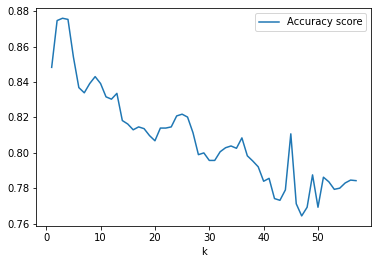

In [16]:
pd.DataFrame(score_list,columns=["k","Accuracy score"]).set_index("k").plot()

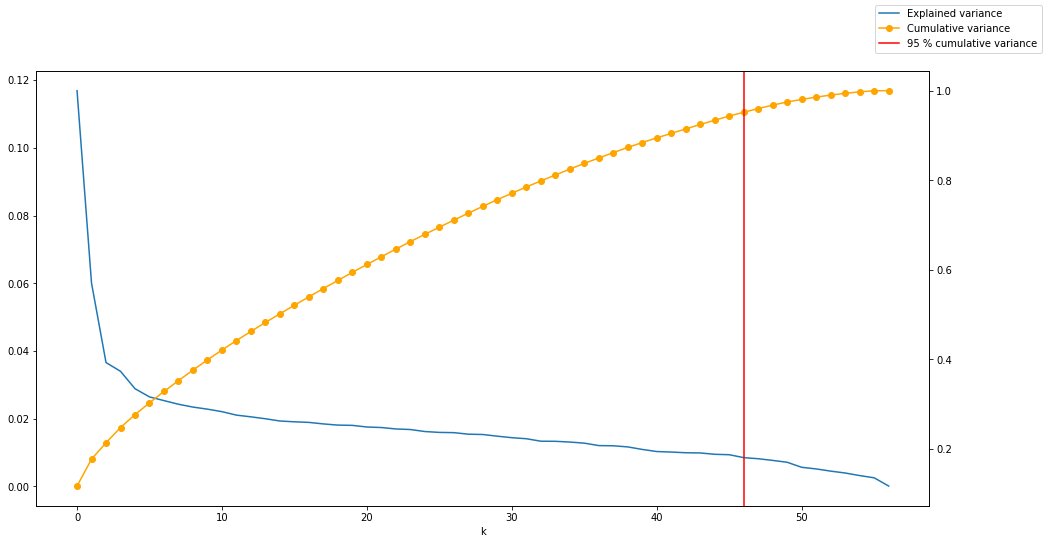

In [17]:
pca = pd.DataFrame(PCA().fit(X_train_scaled).explained_variance_ratio_)
pca['cum'] = pca[0].cumsum()

fig,ax = plt.subplots(figsize=(16,8))
ax.plot(pca.index,pca[0])
ax2 = ax.twinx()
ax2.plot(pca.index,pca['cum'],'o-',color="orange")
# fig.legend(["Explained variance","Cummulative variance"])
ax.set_xlabel("k")
ax2.axvline(pca.cum.loc[pca.cum >= 0.95].iloc[[0]].index,color="red")
fig.legend(["Explained variance","Cumulative variance",'95 % cumulative variance'])


## Problem d)

Not quite sure whats being asked here. 

<AxesSubplot:>

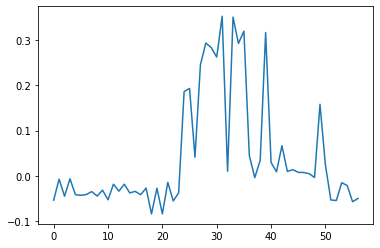

In [18]:
pd.DataFrame(PCA().fit(X_train_scaled).components_).loc[0].plot()

<AxesSubplot:>

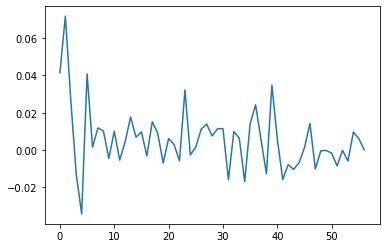

In [19]:
pd.DataFrame(PCA().fit(X_train_scaled).components_).mean(axis=1).plot()

### Problem e)

Using the LogisticGAM function from the pyGAM library I fit a model to the 3 first scaled features. 
https://pygam.readthedocs.io/en/latest/api/logisticgam.html

I do not seem to get any improvement on the linear model with 69.69 % as the worst model so far. 

We can se that the second term included has the most dependence as the high and low of the dependence graph are higher values than  the two other variables. This feature also seems to have a more linear dependence, which could be an explenation of why the linear model outperforms. 

In [20]:
gam = LogisticGAM(s(0) + s(1) + s(2),fit_intercept=True).fit(X_train_scaled.loc[:,:'x3'].values, y_train)
pred = gam.predict(X_test_scaled.loc[:,:'x3'])
score_gam = accuracy_score(y_test,pred)

print('Accuracy score: {:.2%}'.format(score_gam))

Accuracy score: 69.69%


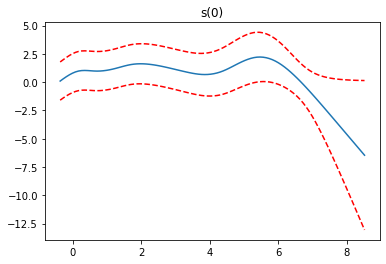

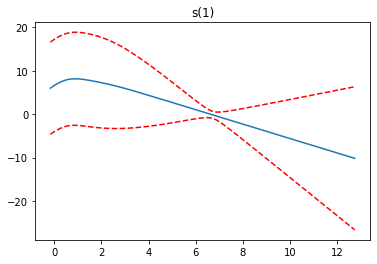

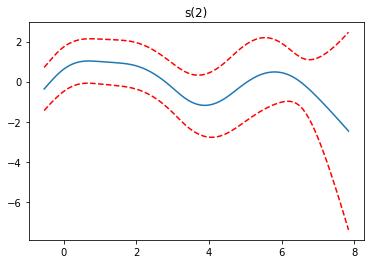

In [21]:
for i, term in enumerate(gam.terms):
    if term.isintercept:
        continue

    XX = gam.generate_X_grid(term=i)
    pdep, confi = gam.partial_dependence(term=i, X=XX, width=0.95)

    plt.figure()
    plt.plot(XX[:, term.feature], pdep)
    plt.plot(XX[:, term.feature], confi, c='r', ls='--')
#     plt.ylim(-10,10)
    plt.title(repr(term))
    plt.show()


## Problem f)

Score is quite a bit better here than the GAM model with the 3 first features. 
It is on the same level as the k=2 principal components model with 87.93 % accuracy. \

With the principal components in the GAM model the dependence seems to be much higher for all the componenets of the model compared to the previous one. 
The first term seem to have the greatest dependence, it also holds the most information as we know from problem c, it also seems to be linear. 
The dependence looks to be greatest at the edges. 



In [22]:
pca_X_train_3 = PCA().fit_transform(X_train_scaled)[:,:3]
pca_X_test_3 = PCA().fit_transform(X_test_scaled)[:,:3]

gam2 = LogisticGAM(s(0) + s(1) + s(2),fit_intercept=True).fit(pca_X_train_3, y_train)
pred = gam2.predict(pca_X_test_3)
score_gam = accuracy_score(y_test,pred)

print('Accuracy score: {:.2%}'.format(score_gam))

Accuracy score: 87.93%


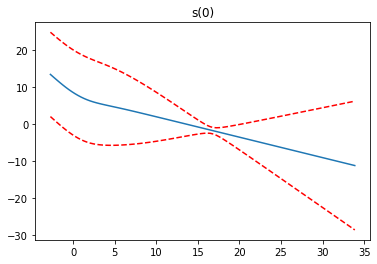

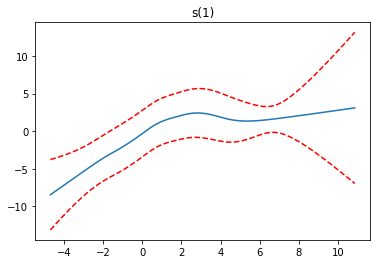

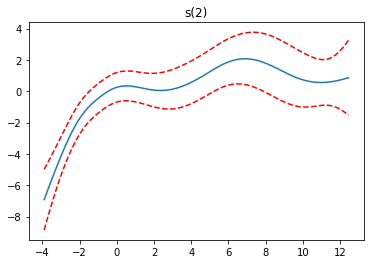

In [23]:
for i, term in enumerate(gam.terms):
    if term.isintercept:
        continue

    XX = gam2.generate_X_grid(term=i)
    pdep, confi = gam2.partial_dependence(term=i, X=XX, width=0.95)

    plt.figure()
    plt.plot(XX[:, term.feature], pdep)
    plt.plot(XX[:, term.feature], confi, c='r', ls='--')
#     plt.ylim(-10,10)
    plt.title(repr(term))
    plt.show()


## Problem g) 

In [24]:
from pygam.terms import TermList, SplineTerm

In [25]:
n = 20
tlist = TermList()

for i in range(n):
    tlist += SplineTerm(i)

tlist

s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7) + s(8) + s(9) + s(10) + s(11) + s(12) + s(13) + s(14) + s(15) + s(16) + s(17) + s(18) + s(19)

In [26]:
pca_X_train_ = PCA().fit_transform(X_train_scaled)[:,:n]
pca_X_test_ = PCA().fit_transform(X_test_scaled)[:,:n]

In [27]:
gam3 = LogisticGAM(terms=tlist,fit_intercept=True).fit(pca_X_train_, y_train)

c:\python38\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
c:\python38\lib\site-packages\pygam\pygam.py:591: RuntimeWarning: invalid value encountered in multiply
  return sp.sparse.diags((self.link.gradient(mu, self.distribution)**2 *
c:\python38\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)
c:\python38\lib\site-packages\pygam\pygam.py:591: RuntimeWarning: overflow encountered in square
  return sp.sparse.diags((self.link.gradient(mu, self.distribution)**2 *
c:\python38\lib\site-packages\pygam\links.py:149: RuntimeWarning: overflow encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
c:\python38\lib\site-packages\pygam\links.py:133: RuntimeWarning: overflow encountered in exp
  elp = np.exp(lp)
c:\python38\lib\site-packages\pygam\links.py:134: RuntimeWarning:

In [28]:
pred = gam3.predict(pca_X_test_)
score_gam3 = accuracy_score(y_test,pred)

print('Accuracy score: {:.2%}'.format(score_gam3))

Accuracy score: 78.11%


## Problem h)  

I cant seem to get past k = 20 on this one. \
Getting some Optimiaztion error which i haven't managed to figure out.

The model accuracy seems to peak at 87.9 % on k = 3. 

In [29]:
from sklearn.metrics import confusion_matrix

In [30]:
import warnings
warnings.filterwarnings("ignore")

score_list = []

for i in (range(X_train.shape[1])):
    n = i
    tlist = TermList()

    for i in range(n):
        tlist += SplineTerm(i)

    pca_X_train_ = PCA().fit_transform(X_train_scaled)[:,:n]
    pca_X_test_ = PCA().fit_transform(X_test_scaled)[:,:n]
    
    gam = LogisticGAM(terms=tlist,tol=0.001,fit_intercept=True).fit(pca_X_train_, y_train)
    pred = gam.predict(pca_X_test_)
    score_gam = accuracy_score(y_test,pred)
    
    score_list.append(score_gam)   


OptimizationError: PIRLS optimization has diverged.
Try increasing regularization, or specifying an initial value for self.coef_

,Accuracy Score,error rate
0,60.26%,39.74%
1,84.76%,15.24%
2,87.77%,12.23%
3,87.93%,12.07%
4,86.95%,13.05%
5,86.30%,13.70%
6,85.71%,14.29%
7,84.67%,15.33%
8,85.09%,14.91%
9,84.14%,15.86%


<AxesSubplot:>

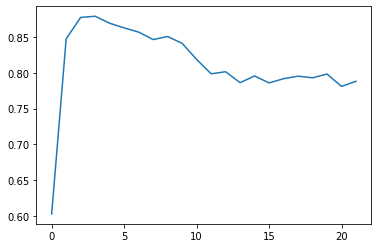

In [31]:
results = pd.DataFrame(score_list,columns=["Accuracy Score"])
results["error rate"] = 1 - results["Accuracy Score"]
display(results.applymap('{:.2%}'.format))
results["Accuracy Score"].plot()

## Problem i)

The very first model was the best model with an accuracy score of 92.10 %, included all
features and no scaling. 
The dataset consistet of twice as much data for testing as for training, which I think is not 
optimal. Usually one wants as much data to train on as possible, and in this case there could be
further performance increases to be gained by increasing the train dataset. 

The models using principal components did worse than the very first model and the model with 
the first 2 components scored about 87 %, which was as good as it got. 
When looking at all possible k principal components the models peaked at k = 2 and performance 
fell as k increased. 

This was somewhat suprising to me. I had expected to atleast see a performance comparable to the first
model when all the principal components where included, all information should be included in the model. 
Makes me wonder if there might be some error in my code. 
The slow increase in the cumulative variance also suprised me somewhat as the best performing model
was found at k = 2. I had expected that the more information included the better performance. Suspecting some error here. 

The first GAM model with only the 3 first features was fairly worse than previous models. The dependence plots showed 
a fairly small range for dependence, with some max and min at the edges. The strongest dependence was from the second features of this model,
which went from max of about 10 to min of -10, the other two features was contained in smaller ranges. 
With the use of the principal compentents the dependence plots seemed to show a greater range, with mostly max and min at the edges.
The score also improved significantly to 87.93 %, about what was seen for previous models. 

By increasing the number of principal components to 20 the accuracy fell to 78.1 %. At least consistent with previous experiments. 

For problem h I ran into some problems with my code and couldn't fit models past k = 20. But the results seemed to look 
very much like the ones I got in problem c). 

